# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [102]:
import numpy as np
import pandas as pd
import tensorflow.keras as keras
from sklearn.preprocessing import LabelEncoder

In [103]:
dataset = pd.read_csv("CarPrice_Assignment.csv")

In [104]:
dataset.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [105]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [106]:
def process_and_normalize_data(dataset, columns_to_remove, columns_to_process):
    encoder = LabelEncoder()
    dataset = dataset.drop(columns_to_remove, axis=1)
    dataset[columns] = dataset[columns].apply(encoder.fit_transform)
    print(dataset[columns])
    return dataset

TRAIN_SIZE = int(dataset.shape[0] * 0.5)
TEST_SIZE = int(dataset.shape[0] * 0.3) + TRAIN_SIZE
print(TRAIN_SIZE, TEST_SIZE)

102 163


In [107]:
columns_to_remove = ["CarName"]
columns = ["fueltype", "aspiration", "carbody", "drivewheel", "enginelocation", "fuelsystem", "enginetype", "cylindernumber"]

c = ["carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio","horsepower", "peakrpm", "citympg", "highwaympg", "price"]
mean = dataset[c].mean(axis=0)
std = dataset[c].std(axis=0)

dataset = process_and_normalize_data(dataset, columns_to_remove, columns)
dataset['doornumber'] = dataset['doornumber'].map({'two':2,'four':4})
print(dataset.head())
y = dataset.price
x = dataset.drop("price", axis=1)

     fueltype  aspiration  carbody  drivewheel  enginelocation  fuelsystem  \
0           1           0        0           2               0           5   
1           1           0        0           2               0           5   
2           1           0        2           2               0           5   
3           1           0        3           1               0           5   
4           1           0        3           0               0           5   
..        ...         ...      ...         ...             ...         ...   
200         1           0        3           2               0           5   
201         1           1        3           2               0           5   
202         1           0        3           2               0           5   
203         0           1        3           2               0           3   
204         1           1        3           2               0           5   

     enginetype  cylindernumber  
0             0              

In [108]:
y_train,y_test,y_val = y[:TRAIN_SIZE],y[TRAIN_SIZE:TEST_SIZE],y[TEST_SIZE:]
x_train,x_test, x_val = x[:TRAIN_SIZE], x[TRAIN_SIZE:TEST_SIZE],x[TEST_SIZE:] 

In [109]:
def build_model():
    model = keras.models.Sequential()
    model.add(keras.layers.Dense(32, input_shape=(24,)))
    model.add(keras.layers.Dense(10, activation="relu"))
    model.add(keras.layers.Dense(8, activation="relu"))
    model.add(keras.layers.Dense(6, activation="relu"))
    model.add(keras.layers.Dense(1))
    model.compile(optimizer="rmsprop", metrics=["mae"], loss="mse")

    return model

In [110]:
model = build_model()

history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=4, shuffle=True)

Epoch 1/100
26/26 [==============================] - 6s 66ms/step - loss: 255180718.8148 - mae: 12482.9658 - val_loss: 108271064.0000 - val_mae: 9509.4639
Epoch 2/100
26/26 [==============================] - 1s 33ms/step - loss: 165807088.0000 - mae: 8978.4685 - val_loss: 57075676.0000 - val_mae: 6302.2686
Epoch 3/100
26/26 [==============================] - 1s 33ms/step - loss: 134245728.9630 - mae: 6762.5613 - val_loss: 22643722.0000 - val_mae: 3593.2456
Epoch 4/100
26/26 [==============================] - 1s 32ms/step - loss: 78635006.7778 - mae: 6016.1606 - val_loss: 16420471.0000 - val_mae: 3243.9480
Epoch 5/100
26/26 [==============================] - 0s 15ms/step - loss: 87699435.9259 - mae: 6982.9622 - val_loss: 15856006.0000 - val_mae: 3334.1731
Epoch 6/100
26/26 [==============================] - 1s 32ms/step - loss: 85360953.7407 - mae: 6857.7078 - val_loss: 15488180.0000 - val_mae: 3294.1333
Epoch 7/100
26/26 [==============================] - 1s 20ms/step - loss: 98569388.

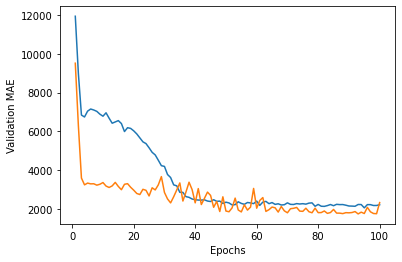

In [111]:
import matplotlib.pyplot as plt

mae = history.history["mae"]
val_mae = history.history["val_mae"]

plt.plot(range(1, len(mae) + 1), mae)
plt.plot(range(1, len(val_mae) + 1), val_mae)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [112]:
val_mse, val_mae = model.evaluate(x_test, y_test, verbose=0)
print("Mean Squared Error:",val_mse)
print("Mean Absolute Error:", val_mae)

Mean Squared Error: 39375752.0
Mean Absolute Error: 3521.017333984375


In [113]:
data_to_predict = x_test.to_numpy()[0]
data_to_predict = data_to_predict.reshape((-1, 24))
prediction = model.predict([np.array(data_to_predict)])

In [114]:
print("Predicted Price: ", prediction)
print("actual price", y_test[102])

Predicted Price:  [[21231.965]]
actual price 14399.0


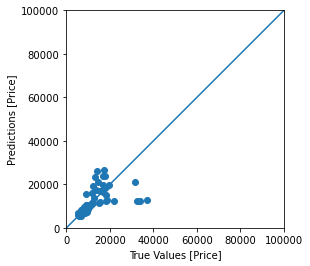

In [115]:
test_predictions = model.predict(x_test).flatten()
a = plt.axes(aspect='equal')
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)